## Etapa 1: Importação das bibliotecas

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'1.13.1+cu116'

In [2]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [3]:
transform = transforms.ToTensor()
train = datasets.FashionMNIST(root = '.', train = True, download = True, 
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



## Etapa 3: Construção do gerador

In [4]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    # 100 -> 32 -> 64 -> 128 -> 784
    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

## Etapa 4: Construção do discriminador

In [5]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    # 784 -> 128 -> 64 -> 32 -> 1
    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28 * 28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

## Etapa 5: Criação dos objetos

In [6]:
G = gerador()
D = discriminador()

In [7]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [8]:
criterion = nn.BCEWithLogitsLoss()

In [9]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [10]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [11]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

ÉPOCA 001 finalizada: custo discriminador 0.829537 - custo gerador 3.392816      


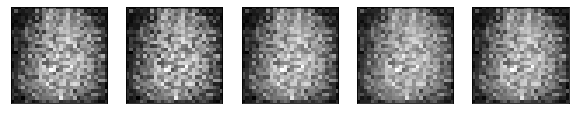

ÉPOCA 002 finalizada: custo discriminador 0.709356 - custo gerador 5.360352      


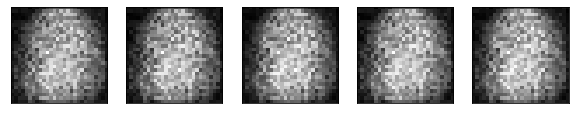

ÉPOCA 003 finalizada: custo discriminador 0.536735 - custo gerador 4.840890      


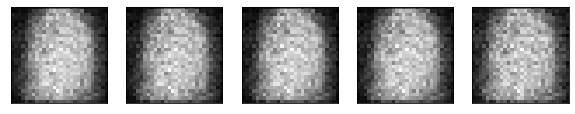

ÉPOCA 004 finalizada: custo discriminador 0.515692 - custo gerador 4.904802      


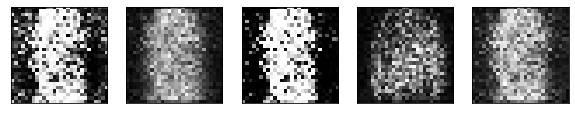

ÉPOCA 005 finalizada: custo discriminador 0.642165 - custo gerador 5.037055      


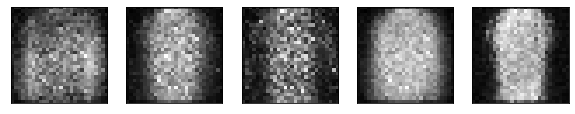

ÉPOCA 006 finalizada: custo discriminador 0.707348 - custo gerador 4.025154      


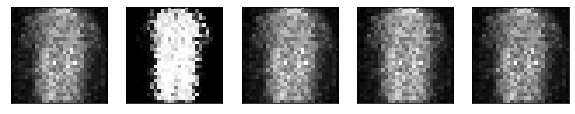

ÉPOCA 007 finalizada: custo discriminador 0.761794 - custo gerador 3.606891      


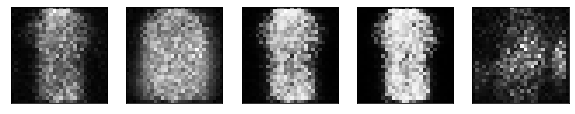

ÉPOCA 008 finalizada: custo discriminador 0.731812 - custo gerador 3.810814      


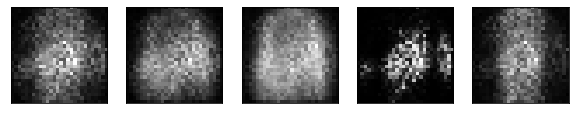

ÉPOCA 009 finalizada: custo discriminador 0.732795 - custo gerador 3.685332      


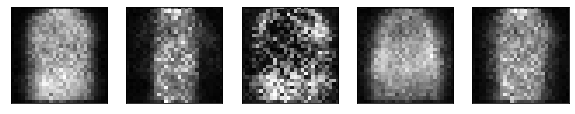

ÉPOCA 010 finalizada: custo discriminador 0.776758 - custo gerador 3.231507      


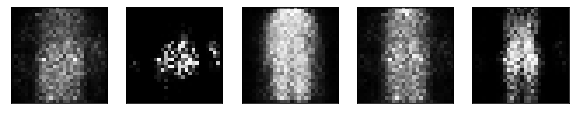

ÉPOCA 011 finalizada: custo discriminador 0.810377 - custo gerador 3.006159      


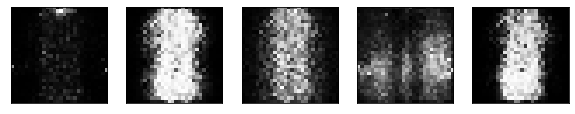

ÉPOCA 012 finalizada: custo discriminador 0.878032 - custo gerador 2.680021      


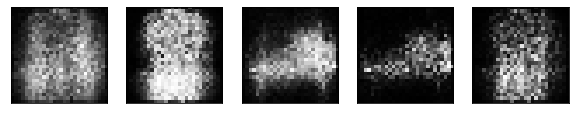

ÉPOCA 013 finalizada: custo discriminador 0.876481 - custo gerador 2.623669      


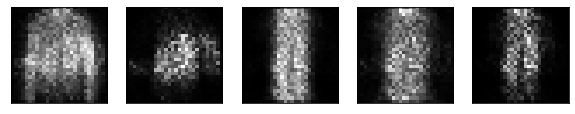

ÉPOCA 014 finalizada: custo discriminador 0.931904 - custo gerador 2.392898      


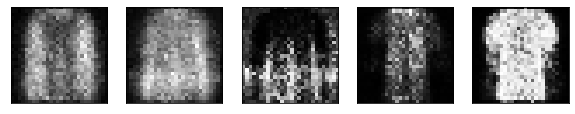

ÉPOCA 015 finalizada: custo discriminador 0.976059 - custo gerador 2.275384      


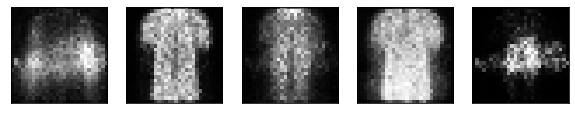

ÉPOCA 016 finalizada: custo discriminador 0.982620 - custo gerador 2.190007      


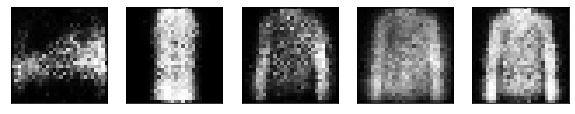

ÉPOCA 017 finalizada: custo discriminador 1.013721 - custo gerador 2.091654      


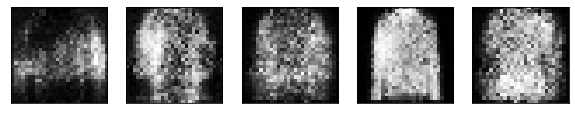

ÉPOCA 018 finalizada: custo discriminador 1.033623 - custo gerador 1.941707      


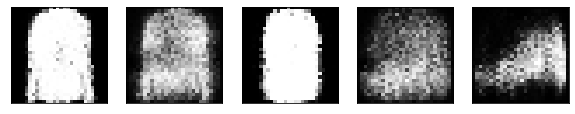

ÉPOCA 019 finalizada: custo discriminador 1.009418 - custo gerador 2.171440      


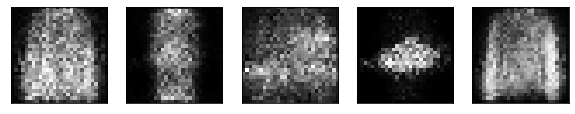

ÉPOCA 020 finalizada: custo discriminador 1.031826 - custo gerador 2.030274      


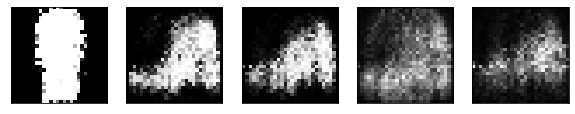

ÉPOCA 021 finalizada: custo discriminador 1.066327 - custo gerador 1.971917      


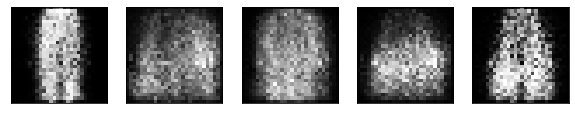

ÉPOCA 022 finalizada: custo discriminador 1.061424 - custo gerador 1.858368      


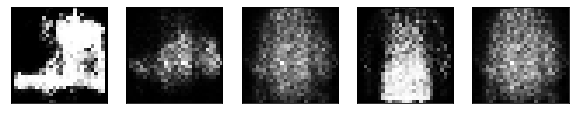

ÉPOCA 023 finalizada: custo discriminador 1.077008 - custo gerador 1.812249      


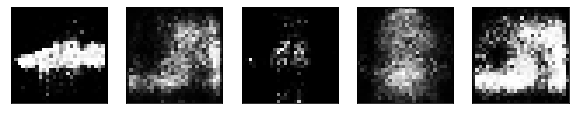

ÉPOCA 024 finalizada: custo discriminador 1.099579 - custo gerador 1.765254      


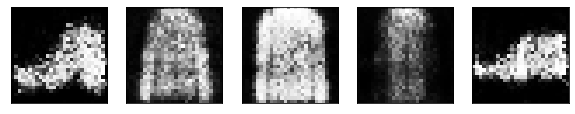

ÉPOCA 025 finalizada: custo discriminador 1.089728 - custo gerador 1.816290      


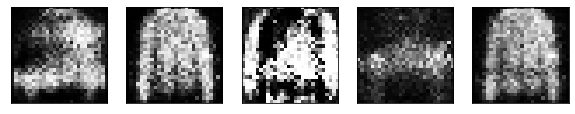

ÉPOCA 026 finalizada: custo discriminador 1.122388 - custo gerador 1.709424      


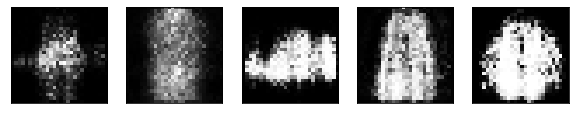

ÉPOCA 027 finalizada: custo discriminador 1.098698 - custo gerador 1.730831      


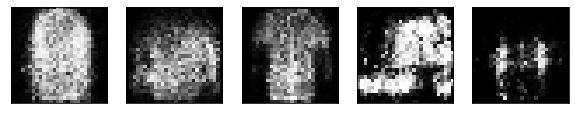

ÉPOCA 028 finalizada: custo discriminador 1.110334 - custo gerador 1.758948      


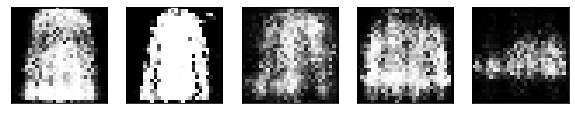

ÉPOCA 029 finalizada: custo discriminador 1.116858 - custo gerador 1.731387      


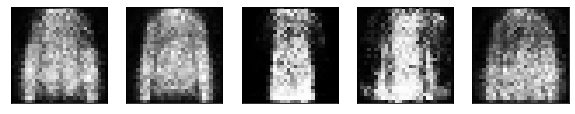

ÉPOCA 030 finalizada: custo discriminador 1.153683 - custo gerador 1.602121      


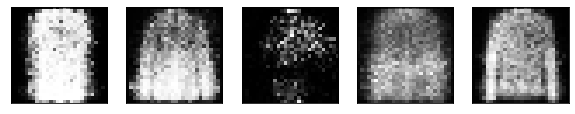

ÉPOCA 031 finalizada: custo discriminador 1.161553 - custo gerador 1.574739      


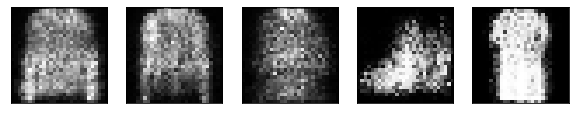

ÉPOCA 032 finalizada: custo discriminador 1.192294 - custo gerador 1.579536      


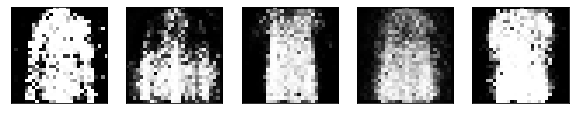

ÉPOCA 033 finalizada: custo discriminador 1.211319 - custo gerador 1.504602      


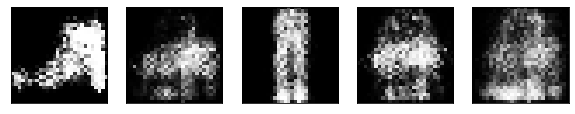

ÉPOCA 034 finalizada: custo discriminador 1.189103 - custo gerador 1.528737      


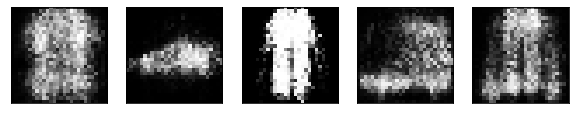

ÉPOCA 035 finalizada: custo discriminador 1.205626 - custo gerador 1.425570      


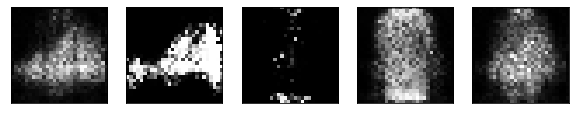

ÉPOCA 036 finalizada: custo discriminador 1.165073 - custo gerador 1.578905      


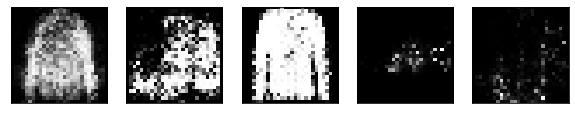

ÉPOCA 037 finalizada: custo discriminador 1.175277 - custo gerador 1.579644      


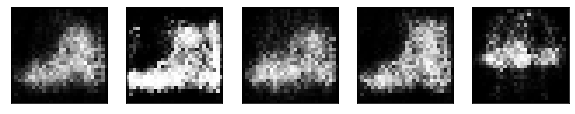

ÉPOCA 038 finalizada: custo discriminador 1.192316 - custo gerador 1.600450      


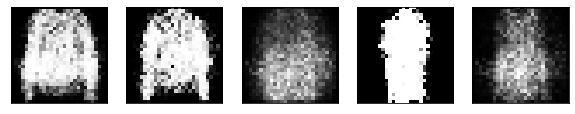

ÉPOCA 039 finalizada: custo discriminador 1.196831 - custo gerador 1.596002      


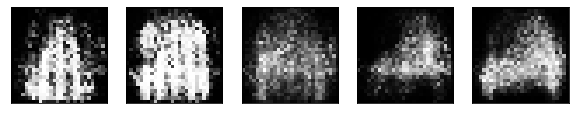

ÉPOCA 040 finalizada: custo discriminador 1.200699 - custo gerador 1.453093      


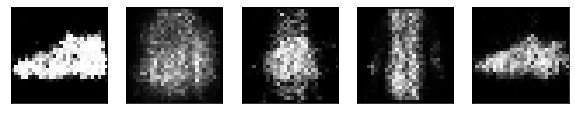

ÉPOCA 041 finalizada: custo discriminador 1.221262 - custo gerador 1.339892      


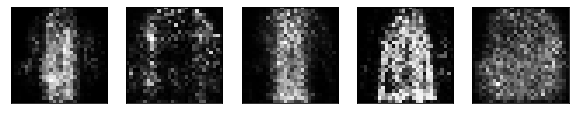

ÉPOCA 042 finalizada: custo discriminador 1.188684 - custo gerador 1.436580      


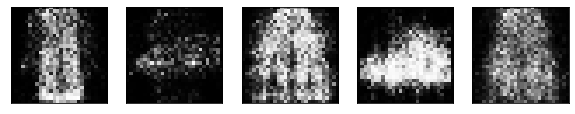

ÉPOCA 043 finalizada: custo discriminador 1.181749 - custo gerador 1.536147      


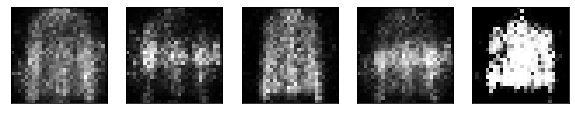

ÉPOCA 044 finalizada: custo discriminador 1.212371 - custo gerador 1.433059      


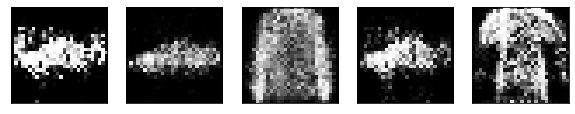

ÉPOCA 045 finalizada: custo discriminador 1.204690 - custo gerador 1.485170      


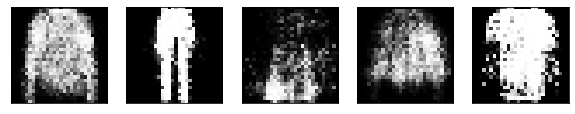

ÉPOCA 046 finalizada: custo discriminador 1.213332 - custo gerador 1.471068      


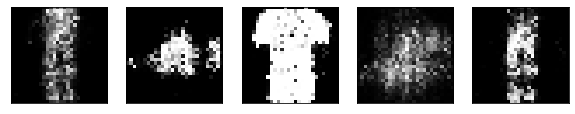

ÉPOCA 047 finalizada: custo discriminador 1.217896 - custo gerador 1.552291      


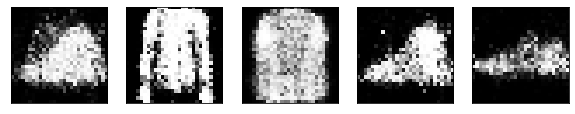

ÉPOCA 048 finalizada: custo discriminador 1.200413 - custo gerador 1.467362      


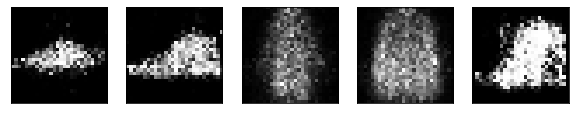

ÉPOCA 049 finalizada: custo discriminador 1.201192 - custo gerador 1.362858      


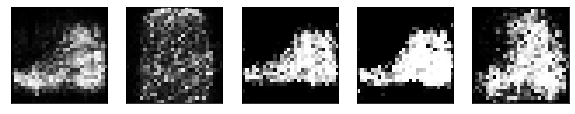

ÉPOCA 050 finalizada: custo discriminador 1.165998 - custo gerador 1.651237      


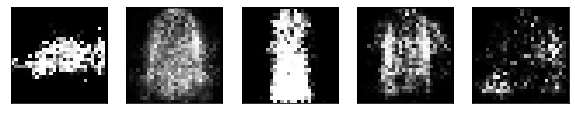

ÉPOCA 051 finalizada: custo discriminador 1.209294 - custo gerador 1.444444      


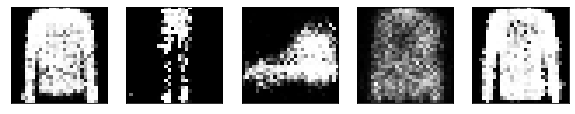

ÉPOCA 052 finalizada: custo discriminador 1.202803 - custo gerador 1.461391      


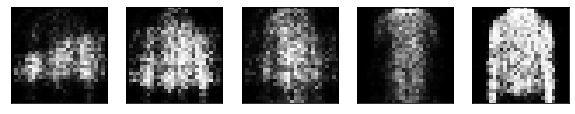

ÉPOCA 053 finalizada: custo discriminador 1.185010 - custo gerador 1.489694      


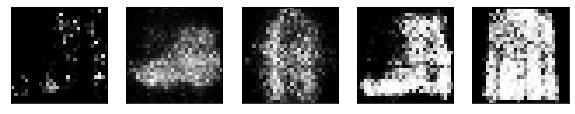

ÉPOCA 054 finalizada: custo discriminador 1.191772 - custo gerador 1.485048      


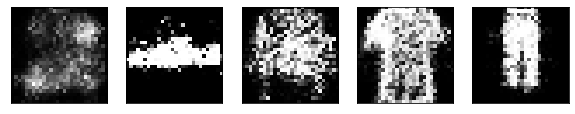

ÉPOCA 055 finalizada: custo discriminador 1.203663 - custo gerador 1.391724      


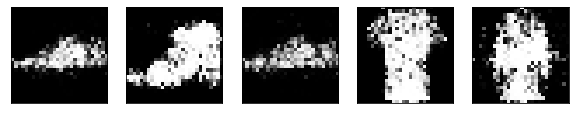

ÉPOCA 056 finalizada: custo discriminador 1.216805 - custo gerador 1.357173      


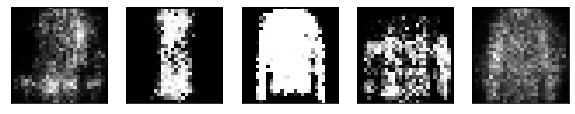

ÉPOCA 057 finalizada: custo discriminador 1.235672 - custo gerador 1.367993      


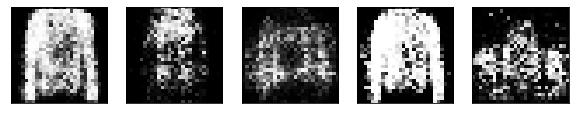

ÉPOCA 058 finalizada: custo discriminador 1.195052 - custo gerador 1.440193      


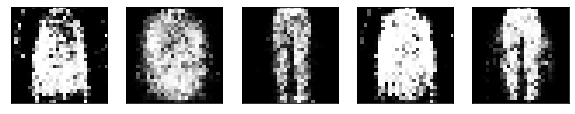

ÉPOCA 059 finalizada: custo discriminador 1.221088 - custo gerador 1.429634      


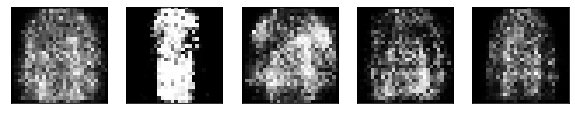

ÉPOCA 060 finalizada: custo discriminador 1.226146 - custo gerador 1.325162      


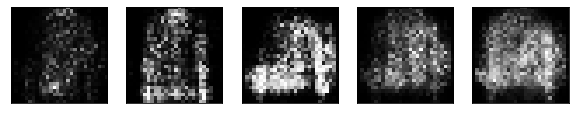

ÉPOCA 061 finalizada: custo discriminador 1.231275 - custo gerador 1.338392      


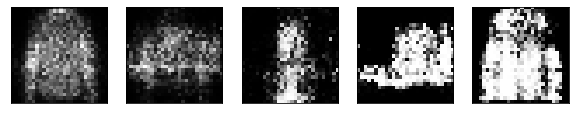

ÉPOCA 062 finalizada: custo discriminador 1.245915 - custo gerador 1.291161      


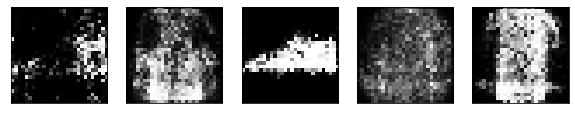

ÉPOCA 063 finalizada: custo discriminador 1.229336 - custo gerador 1.357130      


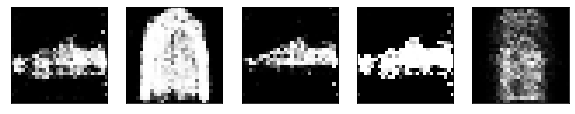

ÉPOCA 064 finalizada: custo discriminador 1.235210 - custo gerador 1.332554      


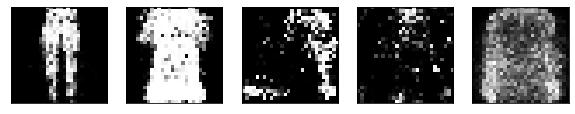

ÉPOCA 065 finalizada: custo discriminador 1.255026 - custo gerador 1.251468      


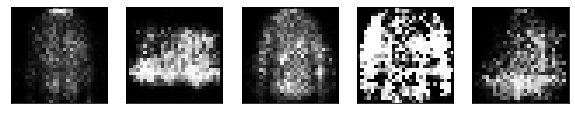

ÉPOCA 066 finalizada: custo discriminador 1.233288 - custo gerador 1.341409      


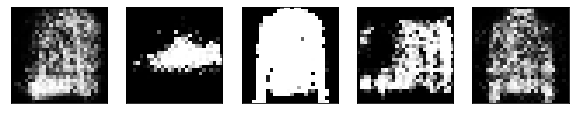

ÉPOCA 067 finalizada: custo discriminador 1.212925 - custo gerador 1.353018      


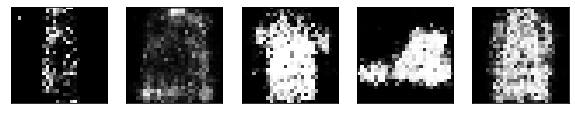

ÉPOCA 068 finalizada: custo discriminador 1.243196 - custo gerador 1.356544      


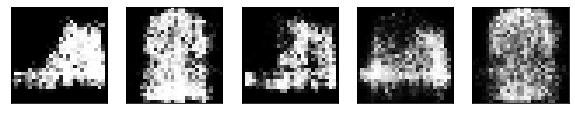

ÉPOCA 069 finalizada: custo discriminador 1.224686 - custo gerador 1.379812      


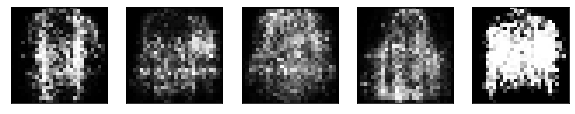

ÉPOCA 070 finalizada: custo discriminador 1.234421 - custo gerador 1.307663      


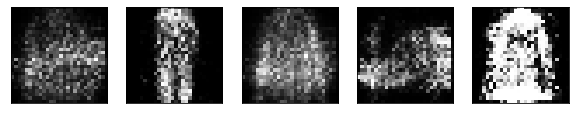

ÉPOCA 071 finalizada: custo discriminador 1.238179 - custo gerador 1.302262      


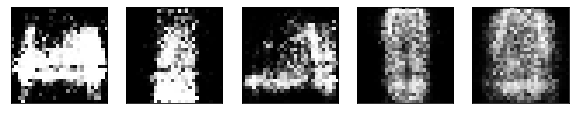

ÉPOCA 072 finalizada: custo discriminador 1.211754 - custo gerador 1.409245      


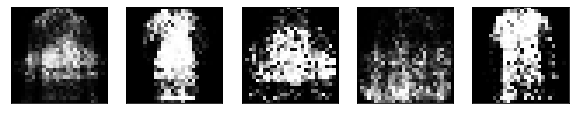

ÉPOCA 073 finalizada: custo discriminador 1.240721 - custo gerador 1.430947      


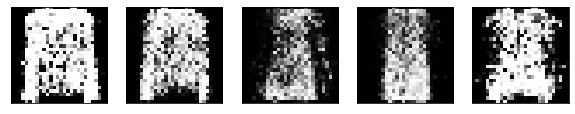

ÉPOCA 074 finalizada: custo discriminador 1.236583 - custo gerador 1.364136      


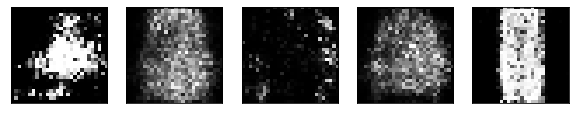

ÉPOCA 075 finalizada: custo discriminador 1.215682 - custo gerador 1.481633      


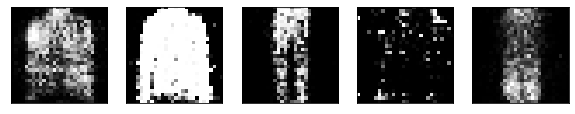

ÉPOCA 076 finalizada: custo discriminador 1.235756 - custo gerador 1.462559      


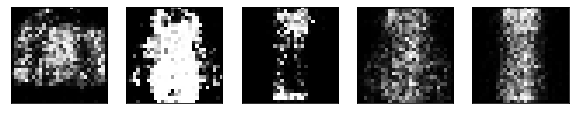

ÉPOCA 077 finalizada: custo discriminador 1.257640 - custo gerador 1.305999      


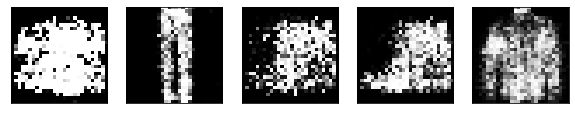

ÉPOCA 078 finalizada: custo discriminador 1.239194 - custo gerador 1.310539      


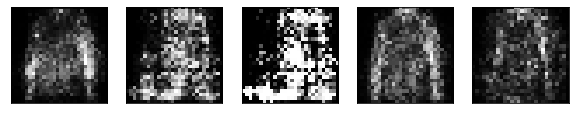

ÉPOCA 079 finalizada: custo discriminador 1.216842 - custo gerador 1.354732      


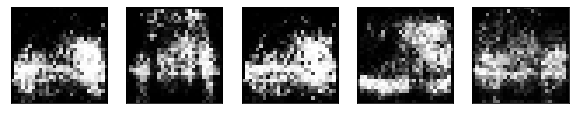

ÉPOCA 080 finalizada: custo discriminador 1.241904 - custo gerador 1.354003      


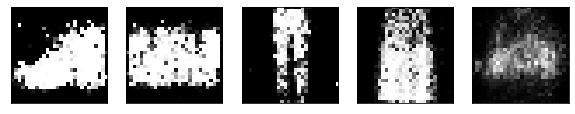

ÉPOCA 081 finalizada: custo discriminador 1.234791 - custo gerador 1.342662      


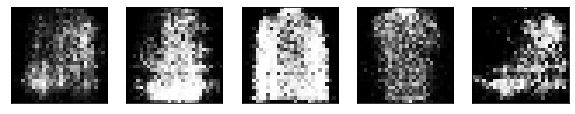

ÉPOCA 082 finalizada: custo discriminador 1.233697 - custo gerador 1.344925      


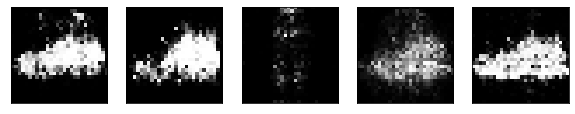

ÉPOCA 083 finalizada: custo discriminador 1.244424 - custo gerador 1.236858      


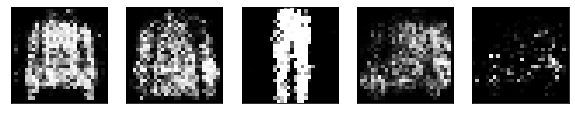

ÉPOCA 084 finalizada: custo discriminador 1.225498 - custo gerador 1.367799      


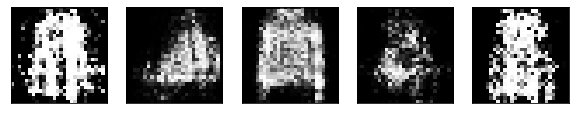

ÉPOCA 085 finalizada: custo discriminador 1.230887 - custo gerador 1.260192      


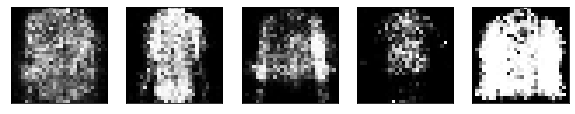

ÉPOCA 086 finalizada: custo discriminador 1.248962 - custo gerador 1.285842      


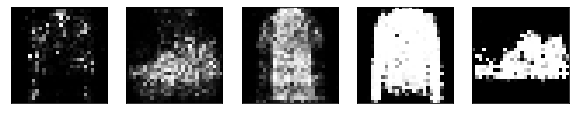

ÉPOCA 087 finalizada: custo discriminador 1.250425 - custo gerador 1.307680      


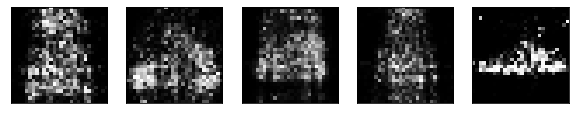

ÉPOCA 088 finalizada: custo discriminador 1.232526 - custo gerador 1.374165      


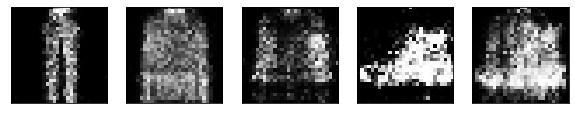

ÉPOCA 089 finalizada: custo discriminador 1.237691 - custo gerador 1.269204      


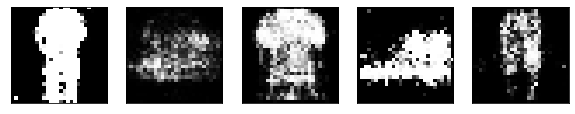

ÉPOCA 090 finalizada: custo discriminador 1.253156 - custo gerador 1.275164      


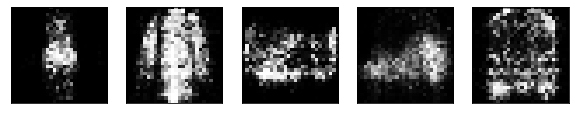

ÉPOCA 091 finalizada: custo discriminador 1.234279 - custo gerador 1.363791      


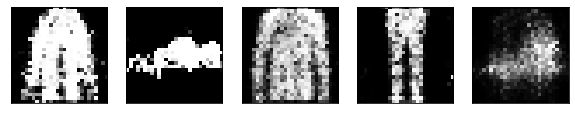

ÉPOCA 092 finalizada: custo discriminador 1.231641 - custo gerador 1.235824      


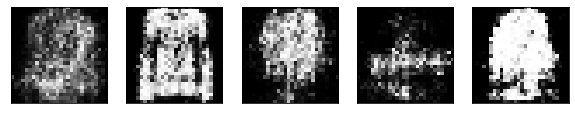

ÉPOCA 093 finalizada: custo discriminador 1.241892 - custo gerador 1.262215      


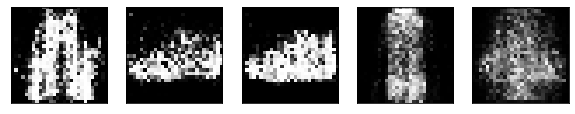

ÉPOCA 094 finalizada: custo discriminador 1.240407 - custo gerador 1.312607      


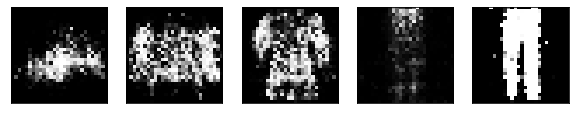

ÉPOCA 095 finalizada: custo discriminador 1.251638 - custo gerador 1.222153      


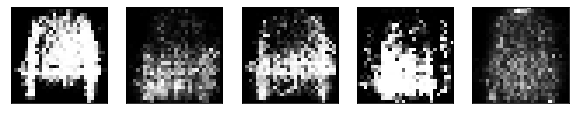

ÉPOCA 096 finalizada: custo discriminador 1.241677 - custo gerador 1.258105      


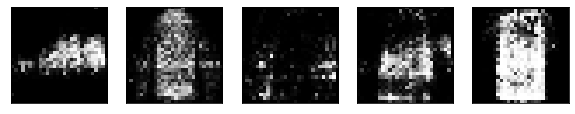

ÉPOCA 097 finalizada: custo discriminador 1.238413 - custo gerador 1.281207      


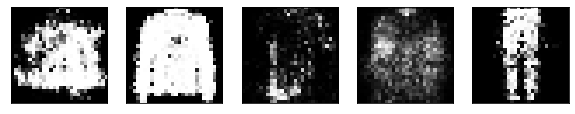

ÉPOCA 098 finalizada: custo discriminador 1.232474 - custo gerador 1.333656      


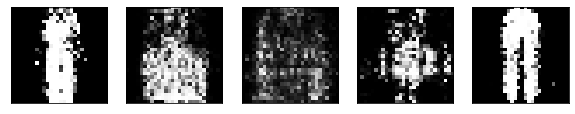

ÉPOCA 099 finalizada: custo discriminador 1.242738 - custo gerador 1.320214      


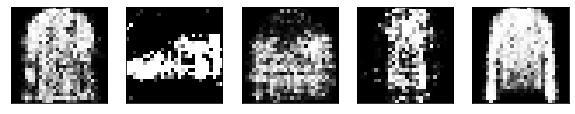

ÉPOCA 100 finalizada: custo discriminador 1.245714 - custo gerador 1.302298      


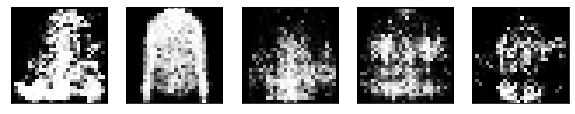

In [12]:
for epoch in range(100):
    D_running_loss = 0
    G_running_loss = 0
    
    for i, (imagens_reais, _) in enumerate(train_loader):
        batch_size = imagens_reais.size(0)
        imagens_reais = imagens_reais * 2 - 1
        imagens_reais = imagens_reais.to(device)

        # Treinamento do gerador
        G_optimizer.zero_grad()
        ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.ones(batch_size).to(device)
        G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
        G_loss.backward()
        G_optimizer.step()

        # Treinamento do discriminador
        D_optimizer.zero_grad()
        outputs_reais = D.forward(imagens_reais)
        labels_reais = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

        ruido = np.random.uniform(-1., 1., (batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.zeros(batch_size).to(device)
        D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

        D_loss = D_loss_reais + D_loss_falsas
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()

        # Imprimindo os dados referentes a esse batch   
        print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch + 1, i + 1, len(train_loader), D_loss.item(), G_loss.item()), end = '\r')
  
    # Imprimindo os dados referentes a essa época
    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)
    print('ÉPOCA {:03d} finalizada: custo discriminador {:03.6f} - custo gerador {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

    fig, ax = plt.subplots(1, 5, figsize=(10,5))
    for i in range(5):
      ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
      ax[i].xaxis.set_visible(False)
      ax[i].yaxis.set_visible(False)
    plt.show()


## Etapa 7: Criação de novas imagens

In [13]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [14]:
ruido[1]

array([ 3.91124226e-01,  3.46630760e-01,  9.47092864e-01, -3.79552571e-01,
       -9.42173010e-01,  7.23771326e-01, -4.49163020e-01, -1.62763136e-02,
       -4.46521540e-02, -6.91824308e-02, -1.78322517e-01, -2.42143880e-01,
        4.15784894e-01,  2.52812077e-01,  6.33053703e-01,  2.23681100e-01,
        2.57355360e-01, -7.08970447e-01,  5.52617017e-01, -9.12872151e-01,
        9.21964606e-01,  8.81428675e-01,  4.89539248e-02, -5.04068042e-01,
       -9.97490071e-01,  3.08727463e-02, -4.60805520e-01,  7.66093455e-01,
        7.94151087e-02,  6.27363451e-01, -2.44024570e-01, -5.88471254e-01,
       -2.25112852e-01, -8.83574502e-01,  1.08942845e-01,  8.58382573e-02,
       -6.64973099e-01,  8.64384967e-02, -6.02374423e-01, -9.46401349e-01,
       -8.25276072e-01, -5.79874189e-01,  9.00031729e-01,  7.63600176e-01,
       -1.82031025e-01, -9.47530936e-01,  1.91347076e-01,  2.54998115e-01,
       -3.99121291e-01, -9.99853268e-02,  8.86125800e-01,  1.67984170e-01,
       -6.08547647e-01, -

In [15]:
ruido = torch.from_numpy(ruido).float().to(device)

In [16]:
type(ruido)

torch.Tensor

In [17]:
G.eval()
previsao = G.forward(ruido)

In [18]:
previsao = previsao.cpu().detach().numpy()

In [19]:
previsao.shape[0]

20

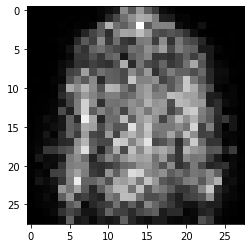

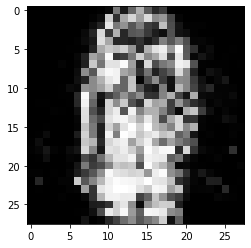

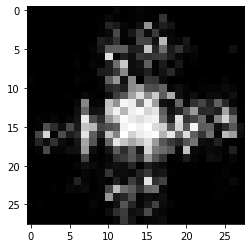

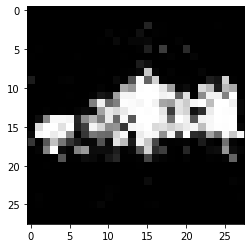

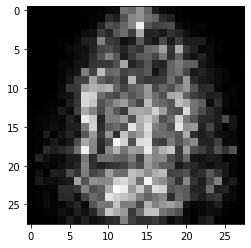

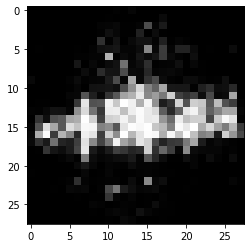

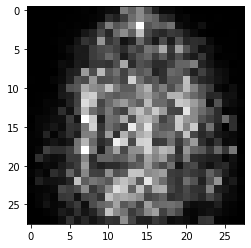

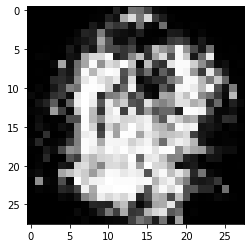

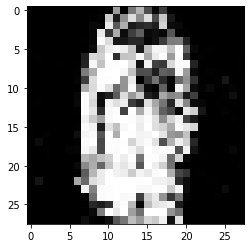

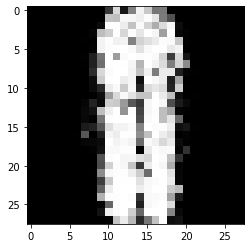

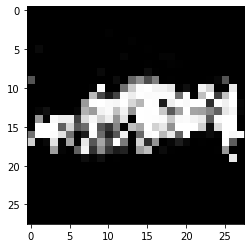

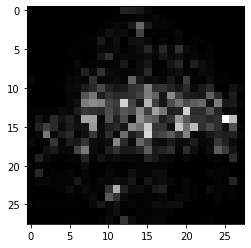

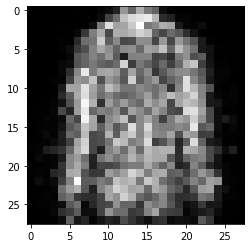

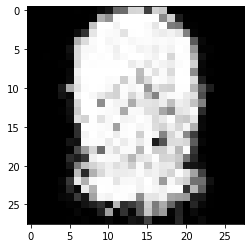

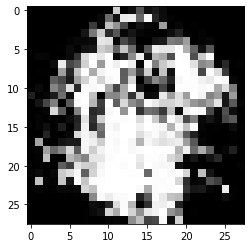

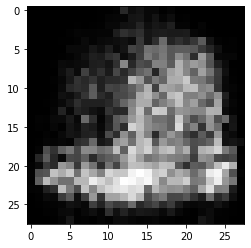

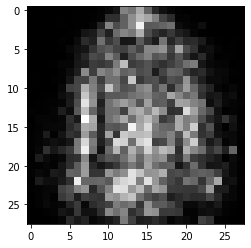

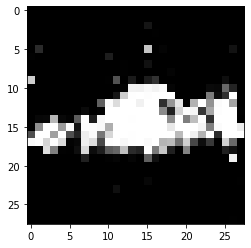

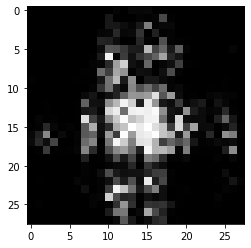

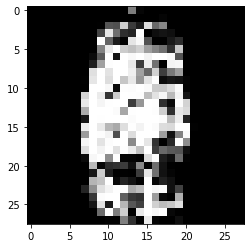

In [20]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap='gray')
  plt.show()